#Logistic Regression Algorithm
#Name: Mohammed Abdul Moyeed
#Z-id: Z1912165

#Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log,exp;
import matplotlib.patches as mpatches
from collections import defaultdict
from sklearn.linear_model import LogisticRegression

#Defining all the required functions

In [ ]:
#This function generates the data to be used for the logistic regression Algorithm
def generate_data():
  np.random.seed(12)
  num_observations = 5000

  class1 = np.random.multivariate_normal( [0,0],[[1,.75],[.75,1]],num_observations)
  class2 = np.random.multivariate_normal( [1,4  ],[[1,.75],[.75,1]],num_observations)

  features = np.vstack((class1,class2)).astype(np.float32)
  labels = np.hstack((np.full(num_observations,-1),np.ones(num_observations)))
  return features,labels

# the features are plotted over a scatterplot with legends and title.
def scatter_plot(features,labels,title):
  plt.scatter([feature[0] for feature in features],[feature[1] for feature in features], s = [-label+25 if(label == -1)else label+200 for label in labels], c = [270 if(label == -1)else 70 for label in labels])
  plt.title(title)
  purple_patch = mpatches.Patch(color='purple', label='The purple data')
  yellow_patch = mpatches.Patch(color='yellow', label='The yellow data')
  plt.legend([purple_patch,yellow_patch], ['1', '-1'])
  plt.show()

#randomly dividing the data into training, validaation and test with 80%,20% respectively.  
def get_train_test_data(features,labels):
  training_data = []
  training_labels = []
  test_data = []
  test_labels = []
  training_percentage = 0
  test_percentage = 0
  rand_choice = 0
  indices_list = [index for index in range(0,10000)]
  while(len(indices_list) !=0):
    rand_choice = np.random.choice(indices_list)
    indices_list.remove(rand_choice)
    training_percentage = int((len(training_data)/10000)*100)
    test_percentage = int((len(test_data)/10000)*100)
    training_filled = training_percentage == 80
    if( training_filled or (test_percentage == 20)):
      if(training_filled):
        test_data.append(features[rand_choice])
        test_labels.append(labels[rand_choice])
      else:
        training_data.append(features[rand_choice])
        training_labels.append(labels[rand_choice])
    elif (rand_choice %2 == 0):
      training_data.append(features[rand_choice])
      training_labels.append(labels[rand_choice])
    else:
      test_data.append(features[rand_choice])
      test_labels.append(labels[rand_choice])

  return np.array(training_data),np.array(training_labels),np.array(test_data),np.array(test_labels)

#calculate the raw scores i.e w1*x1+w2*x2+...wn*xn + bias
def raw_scores(data,weights,bias = None):
  if(bias ==None):
    bias = 0
  raw_score_arr = np.array([np.sum(each_sample*weights) for each_sample in data])
  return raw_score_arr+bias

#calcuate cost for the current weight based on various parameters passed.
def cost_function(data,labels,weights,regularization = False,const_lambda = 0.0001,bias = None):
  len_data = len(data)
  if (regularization):
    reg_data = (const_lambda/2)*np.sum(weights ** 2) #FIXME
  else:
    reg_data = 0
    
  exponentiated_raw_scores = np.exp(-1*labels*(raw_scores(data,weights,bias))) 
  loss_without_regularization = np.log(1+exponentiated_raw_scores)
  sum_loss = np.sum(loss_without_regularization)
  cost = sum_loss/len_data
  return reg_data+cost

#calculates the gradient of the current weight to minimize the score.
def calc_gradient(data,labels,weights,regularization = False,const_lambda = 0.0001,bias = None):
  if(bias ==None):
    bias =0
  len_data = len(data)
  if (regularization):
    reg_data = const_lambda*weights 
  else:
    reg_data = np.zeros(data.shape[1])
  
  gradient = 0
  num = labels*data
  den = 1+ np.exp(labels*((np.array([weights]*len(data)))*(data))+bias)
  gradient = num/den
  gradient_sum = np.sum(gradient)
  return reg_data - (gradient_sum/len_data)

#this function find the appropriate weight for the given data.
def logistic_regression_PB(features,label,num_steps,learning_rate,regularization = False,const_lambda = 0.0001,bias = None):
  weights = np.zeros(features.shape[1])
  total_gradient = 0
  labels_to_broadcast = np.array([np.array([lab,lab]) for lab in label])
  for step in range(num_steps):
    gradient = calc_gradient(features,labels_to_broadcast,weights,regularization,const_lambda,bias)

    avg_gradient = np.mean(gradient,axis=0)

    weights -=learning_rate*avg_gradient

    if(step %1000 == 0):
      print(cost_function(features,label,weights,regularization,const_lambda,bias),weights)

  return weights

# This function inializes the data required and plots them.
def initialize_data():
  features,labels = generate_data()
  scatter_plot(features,labels,"Initial data plot")
  training_data,training_labels,test_data,test_labels = get_train_test_data(features,labels)
  scatter_plot(training_data,training_labels,"Training data plot")
  scatter_plot(test_data,test_labels, "Test data plot")
  return training_data,training_labels,test_data,test_labels

#Prediction function
def predict(weights,test_data,test_labels):
  final_weights =  np.array([weights]*len(test_data))
  preds = test_data*final_weights
  predictions = np.array([f1+f2 for f1,f2 in preds])
  predictions[predictions>=0.5] = 1
  predictions[predictions<0.5] = -1
  accuracy = 0
  for ind,each_pred in enumerate(predictions):
    if(test_labels[ind] == each_pred):
      accuracy +=1
  accuracy = (accuracy/len(test_data))*100
  return predictions,accuracy

#Confusion Matrix
def compute_confusion_matrix(actual_data, prediction):
    # Number of classes 
    len_mat = len(np.unique(actual_data)) 
    #result matrix
    result = np.zeros((len_mat, len_mat),dtype=int) 

    for index in range(len(actual_data)):
      if(actual_data[index] == 1):
        ind1 = 0
      elif(actual_data[index] == -1):
        ind1 = 1
      
      if(prediction[index] == 1):
        ind2 = 0
      elif(prediction[index] == -1):
        ind2 = 1
      result[ind1][ind2] += 1

    return result

def print_confusion_mat(predictions):
  conf_mat_in_count = compute_confusion_matrix(test_labels,predictions)
  print("The confusion matrix in count is shown below\n")
  for nums in [1,-1]:
    print(f"{nums:7d}",end = " ")
  
  sum_conf = defaultdict(lambda:0)
  print("\n_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\n")
  for ind1,each_col in enumerate(conf_mat_in_count):
    for ind2, each_item in enumerate(each_col):
      if(ind2 == 0):
        print(f"{1 if ind1 == 0 else -1:3d}", end=" ")
        print("|", end =" ")
      sum_conf[ind1] += each_item
      print(f"{each_item:3d}", end=" ")
    print()

  print("\nThe Confusion matrix in percentage is shown below.\n")

  for nums in [1,-1]:
    print(f"{nums:9d}",end = " ")
  print("\n   _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\n")
  for ind1,each_col in enumerate(conf_mat_in_count):
    for ind2, each_item in enumerate(each_col):
      if(ind2 == 0):
        print(f"{1 if ind1 == 0 else -1:5d}", end=" ")
        print("|", end =" ")
      temp = (each_item/sum_conf[ind1])*100
      print(f"{temp:5.2f}", end=" ")
    print()


#Initialize the data for training

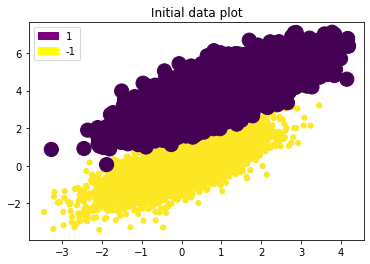

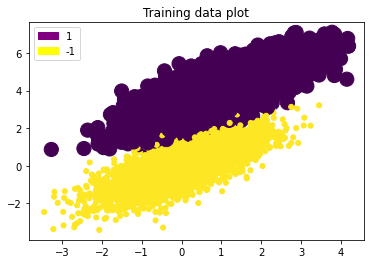

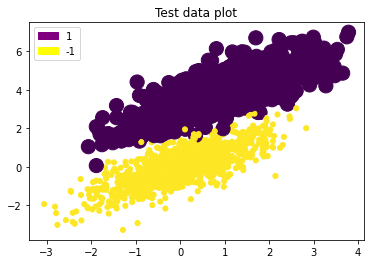

In [ ]:
training_data,training_labels,test_data,test_labels = initialize_data()

#Calculate weights without any bias

In [ ]:
weights_wo_bias = logistic_regression_PB(training_data,training_labels,20000,0.001)

0.691591471875343 [0.00124854 0.00124854]
0.4557072124987504 [0.51991274 0.51991274]
0.4674112152582775 [0.65907383 0.65907383]
0.4762892010782318 [0.71932859 0.71932859]
0.481292462657235 [0.74888129 0.74888129]
0.48402293466476803 [0.76412729 0.76412729]
0.4855044897387537 [0.77218282 0.77218282]
0.48630753815407957 [0.77649088 0.77649088]
0.4867427736449743 [0.77880942 0.77880942]
0.4869786788128823 [0.78006142 0.78006142]
0.4871065526491449 [0.78073872 0.78073872]
0.4871758707874995 [0.78110547 0.78110547]
0.4872134480059297 [0.78130417 0.78130417]
0.48723381887281675 [0.78141186 0.78141186]
0.4872448621599712 [0.78147022 0.78147022]
0.48725084888625375 [0.78150186 0.78150186]
0.4872540943863895 [0.78151901 0.78151901]
0.4872558538265855 [0.78152831 0.78152831]
0.48725680764947493 [0.78153335 0.78153335]
0.4872573247335489 [0.78153608 0.78153608]


#predict test data with weights calculated without bias

In [ ]:
predictions_wo_bias,accuracy_wo_bias = predict(weights_wo_bias,test_data,test_labels)
print("The Accuracy with weights calculated without bias is ",accuracy_wo_bias,"%")

The Accuracy with weights calculated without bias is  80.45 %


#show confusion matrix for predictions without bias

In [ ]:
print_confusion_mat(predictions_wo_bias)

The confusion matrix in count is shown below

      1      -1 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

  1 | 983  15 
 -1 | 376 626 

The Confusion matrix in percentage is shown below.

        1        -1 
   _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

    1 | 98.50  1.50 
   -1 | 37.52 62.48 


#calculate weights with bias

In [ ]:
weights = logistic_regression_PB(features,labels,30000,0.001,regularization = False,const_lambda = -2,bias = 5.6)

2.8036910778750914 [9.18919074e-06 9.18919074e-06]
2.8037272343855038 [0.00902465 0.00902465]
2.8037663798889025 [0.01770906 0.01770906]
2.8038079608636703 [0.02608463 0.02608463]
2.803851517018957 [0.03417135 0.03417135]
2.803896663922876 [0.04198725 0.04198725]
2.803943079246797 [0.04954872 0.04954872]
2.803990491793107 [0.05687063 0.05687063]
2.8040386726834234 [0.06396654 0.06396654]
2.8040874282367594 [0.07084889 0.07084889]
2.8041365941792327 [0.07752907 0.07752907]
2.80418603091011 [0.08401753 0.08401753]
2.8042356196112226 [0.09032396 0.09032396]
2.804285259033802 [0.09645726 0.09645726]
2.8043348628325244 [0.10242569 0.10242569]
2.804384357343952 [0.10823693 0.10823693]
2.804433679727728 [0.11389809 0.11389809]
2.8044827764052584 [0.11941582 0.11941582]
2.8045316017435127 [0.1247963 0.1247963]
2.804580116941625 [0.13004533 0.13004533]
2.804628289085996 [0.13516831 0.13516831]
2.80467609034592 [0.14017033 0.14017033]
2.80472349728685 [0.14505615 0.14505615]
2.8047704902824924 [

#Predict the test data with weights calculated with bias

In [ ]:
predictions,accuracy = predict(weights,test_data,test_labels)
print("The Accuracy with weights calculated without bias is ",accuracy,"%")

The Accuracy with weights calculated without bias is  90.25 %


#Confusion Matrix for predictions calculated with bias

In [ ]:
print_confusion_mat(predictions)

The confusion matrix in count is shown below

      1      -1 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

  1 | 879 119 
 -1 |  76 926 

The Confusion matrix in percentage is shown below.

        1        -1 
   _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

    1 | 88.08 11.92 
   -1 |  7.58 92.42 


#The final weights,intercepts and accuracy of algortihm is shown below:

In [ ]:
print("Algorithm without Bias:::")
print("  weights: ",weights_wo_bias)
print("  Accuracy",accuracy_wo_bias)
print("\n--------------------------------\n")
print("Algorithm considering bias:::")
print("  weights: ",weights)
print("  bias",5.6)
print("  Accuracy",accuracy)

Algorithm without Bias:::
  weights:  [0.78153756 0.78153756]
  Accuracy 80.45

--------------------------------

Algorithm considering bias:::
  weights:  [0.1804432 0.1804432]
  bias 5.6
  Accuracy 90.25


#Scikit learn comparision

In [ ]:


# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(training_data, training_labels)

# Making predictions
y_pred_sk = lr_model.predict(test_data)

# Accuracy
print(f"Accuracy = {lr_model.score(test_data, test_labels)*100}")


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy = 99.5


#Comments on Assignment Implementation:
  The most difficult part of the assignment was to understand what each term signifies and how they would be calculated based on the formula, once that part became clear, the implementation was simple.

  The bias inclusion has improved the algorithm's accuracy to upto 10%.